In [834]:
import numpy as np
import pandas as pd
import re


In [835]:
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [836]:
df = pd.read_csv("gurgaon_cleaned.csv")

In [837]:
df.shape

(3788, 17)

In [838]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,"study room,servant room",0.0,NaN,1 to 5 Year Old,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2.0,2.0,3,not_available,7.0,NaN,0 to 1 Year Old,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basai Dhancourt Railway Station', 'Signature tower']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']"


In [839]:
df["facing"].value_counts()

facing
East          640
North-East    639
North         396
West          255
South         233
North-West    198
South-East    173
South-West    156
Name: count, dtype: int64

In [840]:
# dealing with 1.areaWithType, 2. additionalRoom 3.agePossession 4.furnishDetails 5.features

In [841]:
df[["area", "areaWithType"]].head(5)

,area,areaWithType
0,4800.0,Carpet area: 4800 (445.93 sq.m.)
1,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.)
2,2111.0,Carpet area: 2150 (199.74 sq.m.)
3,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet area: 1855 sq.ft. (172.34 sq.m.)
4,2182.0,Super Built up area 2182(202.71 sq.m.)Built Up area: 1750.75 sq.ft. (162.65 sq.m.)Carpet area: 1670 sq.ft. (155.15 sq.m.)


In [842]:
# Function to extract super_build_up_area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [843]:
# function to extract the built up area or carpet area 
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [844]:

# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [845]:
 df["areaWithType"] =  df["areaWithType"].astype(str)
    
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [846]:
df[["area", "areaWithType", 'super_built_up_area', 'built_up_area', "carpet_area"]].sample(6)

,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1679,333.0,Built Up area: 301 (27.96 sq.m.),NaN,301.0,NaN
491,1805.0,Carpet area: 1805 (167.69 sq.m.),NaN,NaN,1805.000000
292,2066.0,Carpet area: 2066 (191.94 sq.m.),NaN,NaN,2066.000000
2951,959.0,Built Up area: 959 (89.09 sq.m.),NaN,959.0,NaN
1741,2436.0,Super Built up area 2436(226.31 sq.m.)Built Up area: 2236 sq.ft. (207.73 sq.m.)Carpet area: 2036 sq.ft. (189.15 sq.m.),2436.0,2236.0,2036.000000
481,549.0,Carpet area: 549.16 (51.02 sq.m.),NaN,NaN,549.174178


In [847]:
df[~((df["super_built_up_area"].isnull()) |(df["built_up_area"].isnull()) | (df["carpet_area"].isnull()))][["price", "super_built_up_area", "carpet_area", "built_up_area", "areaWithType"]]. sample(5)

,price,super_built_up_area,carpet_area,built_up_area,areaWithType
221,0.99,1815.0,1270.0,1400.0,Super Built up area 1815(168.62 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1270 sq.ft. (117.99 sq.m.)
1620,3.05,2690.0,2240.0,2600.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.)
1465,1.75,2430.0,1800.0,2200.0,Super Built up area 2430(225.75 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)
1480,2.00,2149.0,1650.0,1900.0,Super Built up area 2149(199.65 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.)
1292,0.50,1050.0,645.0,850.0,Super Built up area 1050(97.55 sq.m.)Built Up area: 850 sq.ft. (78.97 sq.m.)Carpet area: 645 sq.ft. (59.92 sq.m.)


In [848]:
df[((df["super_built_up_area"].isnull()) |(df["built_up_area"].isnull()) | (df["carpet_area"].isnull()))][["price", "super_built_up_area", "carpet_area", "built_up_area", "areaWithType"]]. sample(5)

,price,super_built_up_area,carpet_area,built_up_area,areaWithType
1532,0.94,1435.0,NaN,NaN,Super Built up area 1435(133.32 sq.m.)
2240,1.68,2545.0,NaN,NaN,Super Built up area 2545(236.44 sq.m.)
3502,1.78,2191.0,NaN,NaN,Super Built up area 2191(203.55 sq.m.)
2970,2.20,NaN,NaN,NaN,Plot area 1800(167.23 sq.m.)
8,0.22,NaN,321.6,477.809521,Built Up area: 477.85 (44.39 sq.m.)Carpet area: 321.6 sq.ft. (29.88 sq.m.)


In [849]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
Price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1098
agePossession             2
nearbyLocations         176
furnishDetails          977
features                628
super_built_up_area    1873
built_up_area          2609
carpet_area            1847
dtype: int64

In [850]:
all_nan_df = df[((df["super_built_up_area"].isnull()) &(df["built_up_area"].isnull()) & (df["carpet_area"].isnull()))][["price","property_type","area" , "super_built_up_area", "carpet_area", "built_up_area", "areaWithType"]] 

In [851]:
all_nan_index = all_nan_df.index

In [852]:
all_nan_df.head()

,price,property_type,area,super_built_up_area,carpet_area,built_up_area,areaWithType
38,3.20,house,2250.0,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)
49,12.00,house,3150.0,NaN,NaN,NaN,Plot area 350(292.64 sq.m.)
50,2.55,house,1557.0,NaN,NaN,NaN,Plot area 173(144.65 sq.m.)
52,0.38,house,900.0,NaN,NaN,NaN,Plot area 900(83.61 sq.m.)
65,NaN,house,NaN,NaN,NaN,NaN,Plot area 520(434.79 sq.m.)


In [853]:
def extract_plot_area(areaWithType):
    match = re.search(r'Plot area (\d+\.?\d*)', areaWithType)
    try:
        return float(match.group(1))
    except AttributeError:
        return None


In [854]:
all_nan_df["built_up_area"] = all_nan_df["areaWithType"].apply(extract_plot_area)

In [855]:
all_nan_df.head(3)

,price,property_type,area,super_built_up_area,carpet_area,built_up_area,areaWithType
38,3.20,house,2250.0,NaN,NaN,250.0,Plot area 250(209.03 sq.m.)
49,12.00,house,3150.0,NaN,NaN,350.0,Plot area 350(292.64 sq.m.)
50,2.55,house,1557.0,NaN,NaN,173.0,Plot area 173(144.65 sq.m.)


In [856]:
# most of the plot area are in sqyards
# converting to sqft

In [857]:


def convert_metric(row):
    if np.isnan(row["area"]) or np.isnan(row["built_up_area"]):
        return row["built_up_area"]
    
    if round(row["area"] / row["built_up_area"]) == 9.0:
        return row["built_up_area"] * 9
    elif round(row["area"] / row["built_up_area"]) == 11.0:
        return row["built_up_area"] * 10.7
    else:
        return row["built_up_area"]


In [858]:
all_nan_df["built_up_area"] = all_nan_df.apply(convert_metric , axis = 1)

In [859]:
all_nan_df.sample(5)

,price,property_type,area,super_built_up_area,carpet_area,built_up_area,areaWithType
2914,10.50,house,3762.0,NaN,NaN,3762.0,Plot area 418(349.5 sq.m.)
2013,4.45,house,2880.0,NaN,NaN,2880.0,Plot area 320(267.56 sq.m.)
2596,8.00,house,300.0,NaN,NaN,300.0,Plot area 300(27.87 sq.m.)
1260,23.00,house,9000.0,NaN,NaN,9000.0,Plot area 1000(836.13 sq.m.)
2607,18.00,house,3240.0,NaN,NaN,3240.0,Plot area 360(301.01 sq.m.)


In [860]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
Price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1098
agePossession             2
nearbyLocations         176
furnishDetails          977
features                628
super_built_up_area    1873
built_up_area          2609
carpet_area            1847
dtype: int64

In [861]:
df.update(all_nan_df)

In [862]:
all_nan_df.iloc[ 38 ]

price                                         3.5
property_type                               house
area                                       2367.0
super_built_up_area                           NaN
carpet_area                                   NaN
built_up_area                              2367.0
areaWithType           Plot area 263(219.9 sq.m.)
Name: 314, dtype: object

In [863]:
df.update(all_nan_df)

In [864]:
# missing values in built_up_area reduced to 2069 
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
Price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1098
agePossession             2
nearbyLocations         176
furnishDetails          977
features                628
super_built_up_area    1873
built_up_area          2069
carpet_area            1847
dtype: int64

In [865]:
df.sample(3)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
1512,flat,puri diplomatic greens,sector 111,3.45,11694.0,2950.0,Super Built up area 2950(274.06 sq.m.),4.0,5.0,3+,servant room,9.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']",NaN,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Natural Light', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']",2950.0,NaN,NaN
364,flat,kiran residency,sector 56,1.50,6648.0,2256.0,Built Up area: 2250 (209.03 sq.m.),3.0,5.0,3+,"pooja room,study room",4.0,South-East,5 to 10 Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'pracksht hospital', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'Arunodaya Deseret Eye Hospital', 'Vatsalya Clinic', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Madison and Pike', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School', 'Gurugram University']","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '3 Geyser', '5 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']",NaN,2250.0,NaN
158,flat,smart world gems,sector 89,1.25,8784.0,1423.0,Super Built up area 1423(132.2 sq.m.),3.0,3.0,3,pooja room,2.0,North,May 2024,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Visitor Parking']",1423.0,NaN,NaN


In [866]:
df["additionalRoom"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3788 entries, 0 to 3787
Series name: additionalRoom
Non-Null Count  Dtype 
--------------  ----- 
3787 non-null   object
dtypes: object(1)
memory usage: 29.7+ KB


In [867]:
df["additionalRoom"] = df["additionalRoom"].str.replace("not_available", "not available")

In [868]:
 df["additionalRoom"]= df["additionalRoom"].fillna("not available")
new_cols = ["store room", "study room", "servant room", "pooja room", "others"]
for col in new_cols:
    df[col] = df["additionalRoom"].str.contains(col).astype(int)


In [869]:
df[["additionalRoom", "store room", "study room", "servant room", "pooja room", "others"]].sample(4)

,additionalRoom,store room,study room,servant room,pooja room,others
1044,not available,0,0,0,0,0
478,not available,0,0,0,0,0
2954,not available,0,0,0,0,0
911,"pooja room,servant room,others",0,0,1,1,1


In [870]:
df["agePossession"].value_counts()

agePossession
1 to 5 Year Old       1671
5 to 10 Year Old       573
0 to 1 Year Old        529
undefined              329
10+ Year Old           305
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Aug 2024                 4
Jul 2024                 4
Jan 2025                 3
Feb 2024                 3
Nov 2024                 3
May 2024                 3
Jun 2027                 2
Jul 2025                 2
Sep 2025                 2
Jul 2027                 2
Dec 2026                 2
Oct 2025                 2
Mar 2025                 2
Jan 2026                 2
Aug 2025      

In [871]:
def age_possession_engineering(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [872]:
df["agePossession"] = df["agePossession"].apply(age_possession_engineering)

In [873]:
df["agePossession"].value_counts()

agePossession
Relatively New        1671
New Property           625
Moderately Old         573
Undefined              331
Old Property           305
Under Construction     283
Name: count, dtype: int64

In [874]:
df[["furnishDetails", "features"]].head(5)

,furnishDetails,features
0,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"
1,NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']"
2,[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
4,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '6 Light', '1 Curtains', '5 AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center', 'Water softening plant']"


In [875]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [876]:
furnishings_df.shape

(3788, 19)

In [877]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\guriv\AppData\Local\Temp\ipykernel_18068\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [878]:
furnishings_df.sample(5)



,Fan,Bed,Washing Machine,Stove,Modular Kitchen,Sofa,Wardrobe,AC,Curtains,Dining Table,Chimney,Water Purifier,Fridge,Geyser,TV,Exhaust Fan,Microwave,Light
1641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3664,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4
517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3221,0,0,0,0,1,0,1,3,0,0,0,0,0,0,0,1,0,0


In [879]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [880]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [881]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

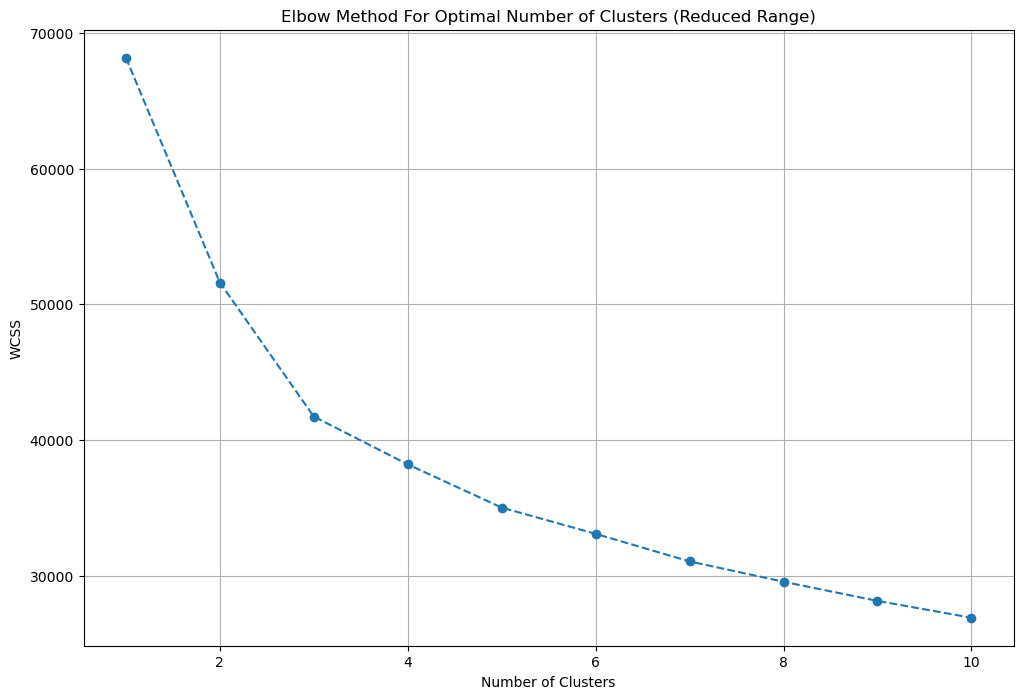

In [882]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [883]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [884]:
df.head(15)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,Fan,Bed,Washing Machine,Stove,Modular Kitchen,Sofa,Wardrobe,AC,Curtains,Dining Table,Chimney,Water Purifier,Fridge,Geyser,TV,Exhaust Fan,Microwave,Light
0,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,"study room,servant room",0.0,NaN,Relatively New,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,4800.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2.0,2.0,3,not available,7.0,NaN,New Property,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basai Dhancourt Railway Station', 'Signature tower']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']",650.0,NaN,596.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,flat,bestech altura,sector 79,1.90,9000.0,2111.0,Carpet area: 2150 (199.74 sq.m.),3.0,4.0,2,servant room,11.0,NaN,New Property,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Extension Road', 'Mount Olympus Junior School', 'Amity University Gurugram', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Savoy Suites, Manesar', 'Golden Greens Golf & Resorts']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2150.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,flat,conscient elevate,sector 59,6.75,19882.0,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet area: 1855 sq.ft. (172.34 sq.m.),4.0,4.0,2,servant room,10.0,NaN,New Property,"['Rapid Metro Station Sector 55', 'Paras Trinity Mall Sector 63', 'Golf Course Road', 'Mehrauli-Gurgaon Road', 'MG Road', 'DPS International School Sector 50', 'Gurugram University Sector 51', 'W Pratiksha Hospital Sector 56', 'Indira Gandhi International Airport', 'Gurugram Railway Station', 'International Tech Park Gurgaon', 'Grand Hyatt Gurgaon', 'SkyJumper Trampoline Park Gurgaon', 'ZEN Golf Range & Academy', 'PVR Drive In Theatre']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",3395.0,NaN,1855.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,flat,vatika city,sector 49,1.98,9074.0,2182.0,Super Built up area 2182(202.71 sq.m.)Built Up area: 1750.75 sq.ft. (162.65 sq.m.)Carpet area: 1670 sq.ft. (155.15 sq.m.),3.0,4.0,3,servant room,9.0,South-East,Moderately Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '

In [885]:
cluster_assignments[:15]

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [886]:
# Defining  mapping from cluster assignments to preferred labels
label_mapping = {0: 1, 1: 0, 2: 2}  # Assuming 0: unfurnished, 1: semifurnished, 2: furnished

# Mapping the cluster assignments to preferred labels
cluster_assignments_mapped = [label_mapping[label] for label in cluster_assignments]


In [887]:
cluster_assignments_mapped[:15]

[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]

In [888]:
df = df.iloc[:,:-18]

In [889]:
df['furnishing_type'] = cluster_assignments_mapped


In [890]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1156,NaN,0
248,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
300,"['3 Wardrobe', '8 Fan', '2 Geyser', '10 Light', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3310,"['5 Geyser', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1332,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '15 Light', '1 Curtains', '1 Chimney', '8 AC', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


In [891]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,"study room,servant room",0.0,NaN,Relatively New,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,4800.00,0,1,1,0,0,0
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2.0,2.0,3,not available,7.0,NaN,New Property,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv Chowk', 'Umang Bhawaj Chawk', 'IMT Manesar', 'NH 8', 'Delhi', 'AIIMS Jhajjar', 'SGT Medical College', 'Vedic Hospital', 'Balaji Hospital', 'Dwarka Expressway', 'Gurgaon Railway Station', 'Basai Dhancourt Railway Station', 'Signature tower']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM']",650.0,NaN,596.12,0,0,0,0,0,0


In [892]:
df['features'].isnull().sum()

628

In [893]:
apartments_df = pd.read_csv("real_estate_data - real_estate_data (1).csv")

In [894]:
apartments_df["PropertyName"] = apartments_df["PropertyName"].str.lower()


In [895]:
apartments_df.head(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,smartworld one dxp,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,m3m crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,adani brahma samsara vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"


In [896]:
tem_df = df[df["features"].isnull()]

In [897]:
tem_df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type
6,flat,emaar the palm drive,sector 66,3.9,18636.0,2093.0,Built Up area: 2200 (204.39 sq.m.),3.0,4.0,3,not available,2.0,NaN,Relatively New,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Ekta Hospital', 'Gobind Hospital', 'Kamal Hospital and Maternity Centre', 'Divine Look Clinic Centre', 'Skin Clinic', 'Vatsalya Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Bones Clinic - Orthopaedics', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Neelkanth Health Care', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Kore Tech Park', 'Hdfc bank', 'Indusind bank', 'Central bank of india', 'Union bank of india', 'State bank of india', 'Icici bank', 'Hdfc bank', 'Icici bank', 'SRS Cinemas', 'Starbucks', 'Nook', 'India', ""Nirula's"", ""Domino's Pizza"", 'Madison and Pike', 'Haldiram', 'Kamla International']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2200.0,NaN,0,0,0,0,0,0
34,flat,essel tower,sector 28,2.2,12500.0,1760.0,Carpet area: 1760 (163.51 sq.m.),3.0,4.0,3+,servant room,3.0,NaN,Moderately Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Kotak mahindra bank ATM', 'Axis bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Icici bank ATM', 'Divine Look Clinic Centre 1', 'Sidhesh Hospital Gurgaon', 'Lord Krishna Hospital', 'Sitaram Bhartia', 'Marwah Clinic', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Chikitsa', 'Guardian', 'Guardian Pharmacy', 'Emaar Business Park', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Axis bank', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'Barbecue Grill', 'NutrioBox Gurugram', 'Bahrisons library']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '1 Stove', '6 Light', '1 Chimney', '1 Curtains', '4 AC', '1 TV', '1 Modular Kitchen', '3 Wardrobe', '3 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']",NaN,NaN,NaN,1760.0,0,0,1,0,0,2


In [898]:
x = tem_df.merge(apartments_df , left_on ="society", right_on = "PropertyName", how = "left" )["TopFacilities"]

In [899]:
df.loc[tem_df.index, "features"]=  x.values

In [900]:
df["features"].isnull().sum()

475

In [901]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [902]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [903]:
features_binary_df.head(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [904]:
features_binary_df.shape

(3788, 130)

In [905]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

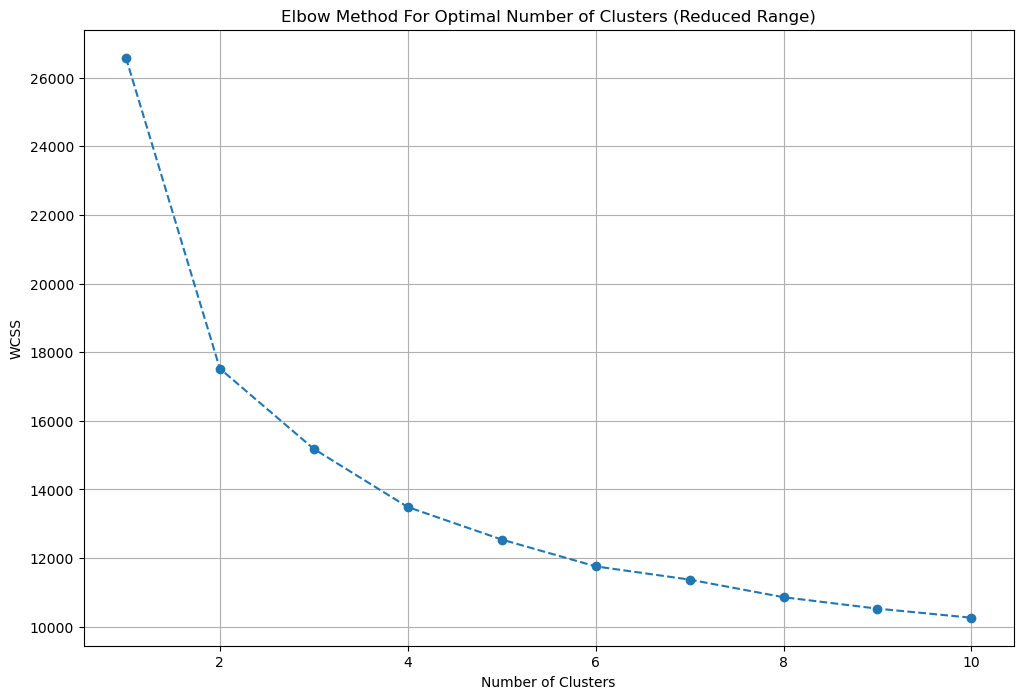

In [906]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [907]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [908]:
df['luxury_score'] = luxury_score

In [909]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [910]:
df.to_csv('gurgaon_properties_feature_engineered_cleaned.csv',index=False)

In [911]:
df.head(3)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,0.0,NaN,Relatively New,NaN,NaN,4800.00,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),2.0,2.0,3,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,0,35
2,flat,bestech altura,sector 79,1.9,9000.0,2111.0,Carpet area: 2150 (199.74 sq.m.),3.0,4.0,2,11.0,NaN,New Property,NaN,NaN,2150.00,0,0,1,0,0,0,49


In [912]:
df.shape

(3788, 23)